In [252]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pickle

In [170]:
match = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

In [171]:
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [172]:
deliveries.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [173]:
match.isna().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [174]:
total_score = deliveries.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [175]:
total_score = total_score[total_score['inning']==1].reset_index()

In [176]:
total_score

,index,match_id,inning,total_runs
0,0,1,1,207
1,2,2,1,184
2,4,3,1,183
3,6,4,1,163
4,8,5,1,157
...,...,...,...,...
751,1518,11347,1,143
752,1520,11412,1,136
753,1522,11413,1,171
754,1524,11414,1,155


In [177]:
match = match.merge(total_score[['match_id','total_runs']], left_on = 'id',right_on = 'match_id')

In [178]:
match['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [179]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Kolkata Knight Riders',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Kings XI Punjab',
    'Royal Challengers Bangalore',
    'Delhi Capitals',
]

In [180]:
match['team1'] = match['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')

match['team2'] = match['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')

match['team1'] = match['team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match['team2'] = match['team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

In [181]:
match = match[match['team1'].isin(teams)]
match = match[match['team2'].isin(teams)]

In [182]:
match = match.reset_index()
match

,index,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,...,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,...,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,...,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
2,6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,...,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178
3,7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,...,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,148
4,9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,...,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,...,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
637,752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,...,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
638,753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,...,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
639,754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,...,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [183]:
total_score_batsman = deliveries.groupby(['batsman']).sum()['total_runs'].reset_index()
total_score_batsman

,batsman,total_runs
0,A Ashish Reddy,288
1,A Chandila,4
2,A Chopra,58
3,A Choudhary,25
4,A Dananjaya,4
...,...,...
511,YV Takawale,207
512,Yashpal Singh,49
513,Younis Khan,3
514,Yuvraj Singh,2895


In [184]:
match = match[match['dl_applied']==0].reset_index()
match

,level_0,index,id,Season,city,date,team1,team2,toss_winner,toss_decision,...,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,0,0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,...,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,1,4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,...,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
2,2,6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,...,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178
3,3,7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,...,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,148
4,4,9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,...,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,636,751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,...,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
622,637,752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,...,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
623,638,753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,...,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
624,639,754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,...,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [185]:
match_new = match.loc[:,['match_id','city','total_runs','winner']]
match_new

,match_id,city,total_runs,winner
0,1,Hyderabad,207,Sunrisers Hyderabad
1,5,Bangalore,157,Royal Challengers Bangalore
2,7,Mumbai,178,Mumbai Indians
3,8,Indore,148,Kings XI Punjab
4,10,Mumbai,158,Mumbai Indians
...,...,...,...,...
621,11347,Mumbai,143,Mumbai Indians
622,11412,Chennai,136,Mumbai Indians
623,11413,Visakhapatnam,171,Delhi Capitals
624,11414,Visakhapatnam,155,Chennai Super Kings


In [186]:
match_new = match_new.merge(deliveries, on = 'match_id')
match_new

,match_id,city,total_runs_x,winner,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,207,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,207,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,207,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,207,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,207,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,152,Mumbai Indians,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149574,11415,Hyderabad,152,Mumbai Indians,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149575,11415,Hyderabad,152,Mumbai Indians,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,Hyderabad,152,Mumbai Indians,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [187]:
match_new_2 = match_new[match_new['inning'] == 2]

In [188]:
match_new['total_runs_x'] = match_new['total_runs_x'] + 1

In [189]:
#match_new['runs_left'] = match_new['total_runs_x'] - match_new['total_runs_y']

In [190]:
match_new_2 = match_new[match_new['inning'] == 2]

In [191]:
match_new_2['balls_left'] = 126 - (match_new_2['over']*6 + match_new_2['ball'])


C:\Users\Pushkar\AppData\Local\Temp/ipykernel_16288/2391775355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_new_2['balls_left'] = 126 - (match_new_2['over']*6 + match_new_2['ball'])


In [192]:
match_new_2['current_score'] = match_new_2.groupby(['match_id']).cumsum()['total_runs_y']

C:\Users\Pushkar\AppData\Local\Temp/ipykernel_16288/1388002497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_new_2['current_score'] = match_new_2.groupby(['match_id']).cumsum()['total_runs_y']


In [193]:
match_new_2['runs_left'] = match_new_2['total_runs_x'] - match_new_2['current_score']

C:\Users\Pushkar\AppData\Local\Temp/ipykernel_16288/3151635775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_new_2['runs_left'] = match_new_2['total_runs_x'] - match_new_2['current_score']


In [194]:
match_new_2['player_dismissed'] = match_new_2['player_dismissed'].fillna('0')
match_new_2['player_dismissed'] = match_new_2['player_dismissed'].apply(lambda x:x if x == '0' else '1')
match_new_2['player_dismissed'] = match_new_2['player_dismissed'].astype('int')


C:\Users\Pushkar\AppData\Local\Temp/ipykernel_16288/4190724679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_new_2['player_dismissed'] = match_new_2['player_dismissed'].fillna('0')
C:\Users\Pushkar\AppData\Local\Temp/ipykernel_16288/4190724679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_new_2['player_dismissed'] = match_new_2['player_dismissed'].apply(lambda x:x if x == '0' else '1')
C:\Users\Pushkar\AppData\Local\Temp/ipykernel_16288/4190724679.py:3: SettingWithCopyWarning: 
A val

In [195]:
wickets = match_new_2.groupby(['match_id']).cumsum()['player_dismissed'].values

In [196]:
wickets

array([0, 0, 0, ..., 6, 6, 7])

In [197]:
match_new_2['wickets'] = 10 - wickets
match_new_2

C:\Users\Pushkar\AppData\Local\Temp/ipykernel_16288/2582920327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_new_2['wickets'] = 10 - wickets


,match_id,city,total_runs_x,winner,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,balls_left,current_score,runs_left,wickets
125,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,119,1,207,10
126,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,118,1,207,10
127,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,117,1,207,10
128,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,116,3,205,10
129,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,115,7,201,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,153,Mumbai Indians,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,1,0,NaN,NaN,4,152,1,5
149574,11415,Hyderabad,153,Mumbai Indians,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,2,0,NaN,NaN,3,154,-1,5
149575,11415,Hyderabad,153,Mumbai Indians,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,0,1,1,run out,KH Pandya,2,155,-2,4
149576,11415,Hyderabad,153,Mumbai Indians,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,2,0,NaN,NaN,1,157,-4,4


In [198]:
match_new_2['current_rate'] = match_new_2['current_score']/(120 - match_new_2['balls_left'])*6

C:\Users\Pushkar\AppData\Local\Temp/ipykernel_16288/3423530817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_new_2['current_rate'] = match_new_2['current_score']/(120 - match_new_2['balls_left'])*6


In [199]:
match_new_2['required_rate'] = match_new_2['runs_left']/(match_new_2['balls_left'])*6
match_new_2

C:\Users\Pushkar\AppData\Local\Temp/ipykernel_16288/1109493327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_new_2['required_rate'] = match_new_2['runs_left']/(match_new_2['balls_left'])*6


,match_id,city,total_runs_x,winner,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,balls_left,current_score,runs_left,wickets,current_rate,required_rate
125,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,119,1,207,10,6.000000,10.436975
126,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,118,1,207,10,3.000000,10.525424
127,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,117,1,207,10,2.000000,10.615385
128,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,NaN,NaN,116,3,205,10,4.500000,10.603448
129,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,NaN,NaN,115,7,201,10,8.400000,10.486957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,153,Mumbai Indians,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,NaN,NaN,4,152,1,5,7.862069,1.500000
149574,11415,Hyderabad,153,Mumbai Indians,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,NaN,NaN,3,154,-1,5,7.897436,-2.000000
149575,11415,Hyderabad,153,Mumbai Indians,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,1,run out,KH Pandya,2,155,-2,4,7.881356,-6.000000
149576,11415,Hyderabad,153,Mumbai Indians,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,NaN,NaN,1,157,-4,4,7.915966,-24.000000


In [200]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [201]:
match_new_2['result'] = match_new_2.apply(result,axis = 1)

C:\Users\Pushkar\AppData\Local\Temp/ipykernel_16288/1430564738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_new_2['result'] = match_new_2.apply(result,axis = 1)


In [202]:
match_new_2

,match_id,city,total_runs_x,winner,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,balls_left,current_score,runs_left,wickets,current_rate,required_rate,result
125,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,119,1,207,10,6.000000,10.436975,0
126,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,118,1,207,10,3.000000,10.525424,0
127,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,117,1,207,10,2.000000,10.615385,0
128,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,116,3,205,10,4.500000,10.603448,0
129,1,Hyderabad,208,Sunrisers Hyderabad,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,115,7,201,10,8.400000,10.486957,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,153,Mumbai Indians,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,NaN,NaN,4,152,1,5,7.862069,1.500000,0
149574,11415,Hyderabad,153,Mumbai Indians,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,NaN,NaN,3,154,-1,5,7.897436,-2.000000,0
149575,11415,Hyderabad,153,Mumbai Indians,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,run out,KH Pandya,2,155,-2,4,7.881356,-6.000000,0
149576,11415,Hyderabad,153,Mumbai Indians,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,NaN,NaN,1,157,-4,4,7.915966,-24.000000,0


In [203]:
final_df = match_new_2.loc[:,['batting_team','bowling_team','city','runs_left','balls_left','wickets','current_rate','required_rate','result','total_runs_x']]

In [204]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,current_rate,required_rate,result,total_runs_x
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,119,10,6.000000,10.436975,0,208
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,118,10,3.000000,10.525424,0,208
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,117,10,2.000000,10.615385,0,208
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,205,116,10,4.500000,10.603448,0,208
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,201,115,10,8.400000,10.486957,0,208
...,...,...,...,...,...,...,...,...,...,...
149573,Chennai Super Kings,Mumbai Indians,Hyderabad,1,4,5,7.862069,1.500000,0,153
149574,Chennai Super Kings,Mumbai Indians,Hyderabad,-1,3,5,7.897436,-2.000000,0,153
149575,Chennai Super Kings,Mumbai Indians,Hyderabad,-2,2,4,7.881356,-6.000000,0,153
149576,Chennai Super Kings,Mumbai Indians,Hyderabad,-4,1,4,7.915966,-24.000000,0,153


In [205]:
final_df = final_df.sample(final_df.shape[0])

In [206]:
final_df.dropna(inplace = True)

In [214]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,current_rate,required_rate,result,total_runs_x
139310,Kolkata Knight Riders,Royal Challengers Bangalore,Bengaluru,175,105,9,14.400000,10.000000,1,211
3356,Delhi Daredevils,Mumbai Indians,Mumbai,58,34,4,5.930233,10.235294,0,143
13130,Deccan Chargers,Chennai Super Kings,Chennai,90,82,9,8.684211,6.585366,1,145
95634,Kings XI Punjab,Sunrisers Hyderabad,Hyderabad,111,78,9,13.571429,8.538462,1,206
103147,Kolkata Knight Riders,Chennai Super Kings,Kolkata,64,37,7,7.373494,10.378378,1,166
...,...,...,...,...,...,...,...,...,...,...
73678,Kolkata Knight Riders,Rajasthan Royals,Jaipur,108,87,8,6.727273,7.448276,0,145
16118,Deccan Chargers,Delhi Daredevils,Delhi,157,96,9,9.500000,9.812500,0,195
64178,Mumbai Indians,Kings XI Punjab,Chandigarh,151,105,10,7.200000,8.628571,1,169
48487,Mumbai Indians,Delhi Daredevils,Delhi,34,48,8,5.166667,4.250000,1,96


In [216]:
final_df= final_df[final_df['balls_left'] != 0]

In [221]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,current_rate,required_rate,result,total_runs_x
139310,Kolkata Knight Riders,Royal Challengers Bangalore,Bengaluru,175,105,9,14.400000,10.000000,1,211
3356,Delhi Daredevils,Mumbai Indians,Mumbai,58,34,4,5.930233,10.235294,0,143
13130,Deccan Chargers,Chennai Super Kings,Chennai,90,82,9,8.684211,6.585366,1,145
95634,Kings XI Punjab,Sunrisers Hyderabad,Hyderabad,111,78,9,13.571429,8.538462,1,206
103147,Kolkata Knight Riders,Chennai Super Kings,Kolkata,64,37,7,7.373494,10.378378,1,166
...,...,...,...,...,...,...,...,...,...,...
73678,Kolkata Knight Riders,Rajasthan Royals,Jaipur,108,87,8,6.727273,7.448276,0,145
16118,Deccan Chargers,Delhi Daredevils,Delhi,157,96,9,9.500000,9.812500,0,195
64178,Mumbai Indians,Kings XI Punjab,Chandigarh,151,105,10,7.200000,8.628571,1,169
48487,Mumbai Indians,Delhi Daredevils,Delhi,34,48,8,5.166667,4.250000,1,96


In [217]:
X = final_df.drop(['result'], axis = 1)
y = final_df['result']


In [218]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [219]:
col_trans = ColumnTransformer([
    ('col_trans', OneHotEncoder(sparse = False, drop = 'first'),['batting_team', 'bowling_team', 'city'])
], remainder = 'passthrough')

In [220]:
pipe = Pipeline(steps=[
    ('step1',col_trans),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [222]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_trans',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [223]:
y_pred = pipe.predict(X_test)

In [226]:
accuracy_score(y_test, y_pred)*100

80.05466395682949

In [228]:
pipe_random = Pipeline(steps=[
    ('step1',col_trans),
    ('step2',RandomForestClassifier(n_estimators = 200, max_depth=30))
])

In [229]:
pipe_random.fit(X_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_trans',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2',
                 RandomForestClassifier(max_depth=30, n_estimators=200))])

In [230]:
y_pred_random = pipe_random.predict(X_test)

In [231]:
accuracy_score(y_test, y_pred_random)*100

99.90188520569066

In [232]:
#Used Logistic Regression as final model becasue internally it uses sigmoid function and gives accurate probability for ball to ball situation

In [233]:
def match_summary(row):
    return ('Batting team '+row['batting_team']+'Bowling team '+row['bowling_team']+'Target- '+row['total_score_x'])

In [247]:
def match_progress(row, match_id, pipe):
    match = row[row['match_id'] == match_id]
    match = match[match['ball']==6]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','current_rate','required_rate','result','total_runs_x']]
    temp_df = temp_df[temp_df['balls_left']!=0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1]-np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw-w)[0:temp_df.shape[0]]
    print("Target- ", target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','win','lose']]
    return temp_df, target

In [248]:
temp_df,target = match_progress(match_new_2, 74, pipe)
temp_df

Target-  179


,end_of_over,runs_after_over,wickets_in_over,win,lose
10459,1,4,0,44.2,55.8
10467,2,8,0,49.5,50.5
10473,3,1,0,42.8,57.2
10479,4,7,1,31.0,69.0
10485,5,12,0,41.1,58.9
10491,6,13,0,53.4,46.6
10497,7,9,0,59.3,40.7
10505,8,15,0,72.9,27.1
10511,9,7,0,75.0,25.0
10518,10,17,0,86.3,13.7


Text(0.5, 1.0, 'Target - 179')

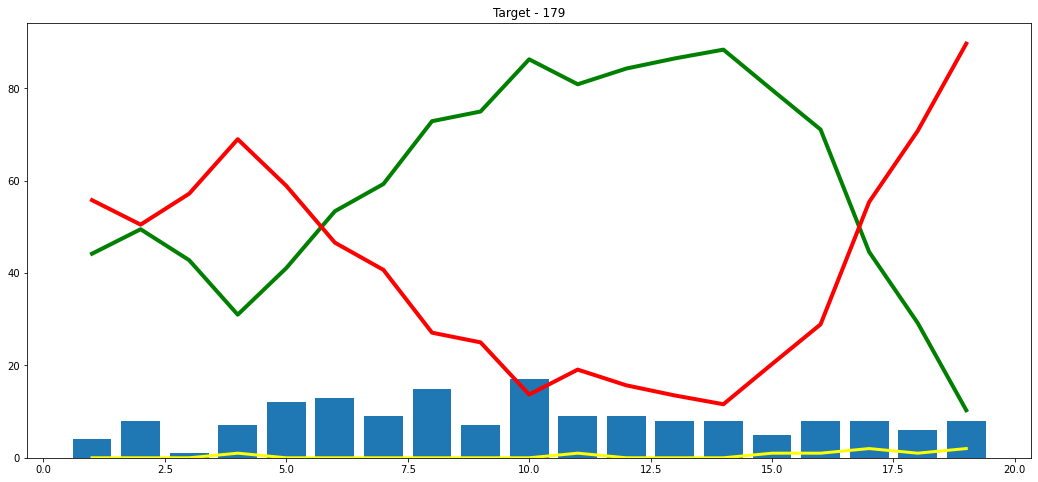

In [251]:
plt.figure(figsize = (18,8))
plt.plot(temp_df['end_of_over'], temp_df['wickets_in_over'], color = 'yellow', linewidth = 3)
plt.plot(temp_df['end_of_over'],temp_df['win'], color = 'green', linewidth = 4)
plt.plot(temp_df['end_of_over'], temp_df['lose'], color = 'red', linewidth = 4)
plt.bar(temp_df['end_of_over'], temp_df['runs_after_over'])
plt.title('Target - '+str(target))

In [253]:
pickle.dump(pipe, open('pipe.pkl', 'wb'))

In [256]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,current_rate,required_rate,result,total_runs_x
139310,Kolkata Knight Riders,Royal Challengers Bangalore,Bengaluru,175,105,9,14.400000,10.000000,1,211
3356,Delhi Daredevils,Mumbai Indians,Mumbai,58,34,4,5.930233,10.235294,0,143
13130,Deccan Chargers,Chennai Super Kings,Chennai,90,82,9,8.684211,6.585366,1,145
95634,Kings XI Punjab,Sunrisers Hyderabad,Hyderabad,111,78,9,13.571429,8.538462,1,206
103147,Kolkata Knight Riders,Chennai Super Kings,Kolkata,64,37,7,7.373494,10.378378,1,166
...,...,...,...,...,...,...,...,...,...,...
73678,Kolkata Knight Riders,Rajasthan Royals,Jaipur,108,87,8,6.727273,7.448276,0,145
16118,Deccan Chargers,Delhi Daredevils,Delhi,157,96,9,9.500000,9.812500,0,195
64178,Mumbai Indians,Kings XI Punjab,Chandigarh,151,105,10,7.200000,8.628571,1,169
48487,Mumbai Indians,Delhi Daredevils,Delhi,34,48,8,5.166667,4.250000,1,96
